In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing;
from sklearn.model_selection import cross_validate as cross_validation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [39]:
import datetime
from datetime import timedelta
forecast_out = 3650 #Days from now

stock_ticker ='AMZN'

end = datetime.datetime.now()#-timedelta(7) #remove timedetla -1 to go to productions mode
start = datetime.datetime.now()-timedelta(forecast_out)

# benchmark = web.DataReader(stock_ticker, 'yahoo', start, end )
stock = web.DataReader(stock_ticker, 'yahoo', start, end)


In [40]:
test_size=20
test_index = len(stock['Adj Close'])- test_size

In [41]:
train = stock['Adj Close'].iloc[:test_index]
test= stock['Adj Close'].iloc[test_index:]

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler=MinMaxScaler()
scaler.fit(train.to_frame())
scaled_train = scaler.transform(train.to_frame())
scaled_test = scaler.transform(test.to_frame())

In [44]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [45]:
length=19
generator = TimeseriesGenerator(scaled_train,scaled_train, length=length, batch_size=1)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [47]:
n_features =1
model= Sequential()
# pretty good model at 200 epochs
# model.add(LSTM(50, activation='relu', input_shape=(length, n_features)))
# model.add(Dropout(0.2))
# model.add(Dense(25, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(10, activation='relu'))
# model.add(Dropout(0.2))

model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [48]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [49]:
validation_generator= TimeseriesGenerator(scaled_test, scaled_test,
                                          length=length, batch_size =1)

In [50]:
# model.fit_generator(generator, epochs=20,
#                    validation_data=validation_generator, callbacks=[early_stop])
model.fit_generator(generator, epochs=200,
                   validation_data=validation_generator)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2477 steps, validate for 1 steps
Epoch 1/200
2477/2477 [==============================] - 19s 7ms/step - loss: 0.0102 - val_loss: 2.3632e-04
Epoch 2/200
2477/2477 [==============================] - 16s 7ms/step - loss: 0.0059 - val_loss: 0.0313
Epoch 3/200
2477/2477 [==============================] - 16s 6ms/step - loss: 0.0053 - val_loss: 0.0151
Epoch 4/200
2477/2477 [==============================] - 16s 6ms/step - loss: 0.0054 - val_loss: 0.0183
Epoch 5/200
2477/2477 [==============================] - 16s 7ms/step - loss: 0.0053 - val_loss: 0.0061
Epoch 6/200
2477/2477 [==============================] - 16s 7ms/step - loss: 0.0051 - val_loss: 0.0150
Epoch 7/200
2477/2477 [==============================] - 17s 7ms/step - loss: 0.0047 - val_loss: 4.9487e-06
Epoch 8/200
2477/2477 [==============================] - 17s 7ms/step - loss: 0.0047 - val_loss: 0.0269
Epoch 9/200
2477/2477 [==============================] - 17s 7ms/st

KeyboardInterrupt: 

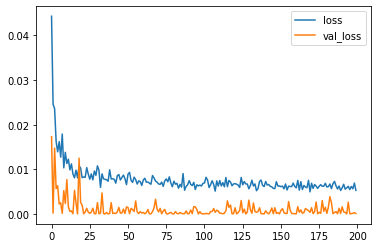

In [32]:
losses= pd.DataFrame(model.history.history)
ax =losses.plot()
plt.show()

In [33]:
test_predictions =[]
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

In [34]:
true_predictions =scaler.inverse_transform(test_predictions)


In [35]:
predictions = pd.DataFrame(test)
predictions['Predictions'] = true_predictions

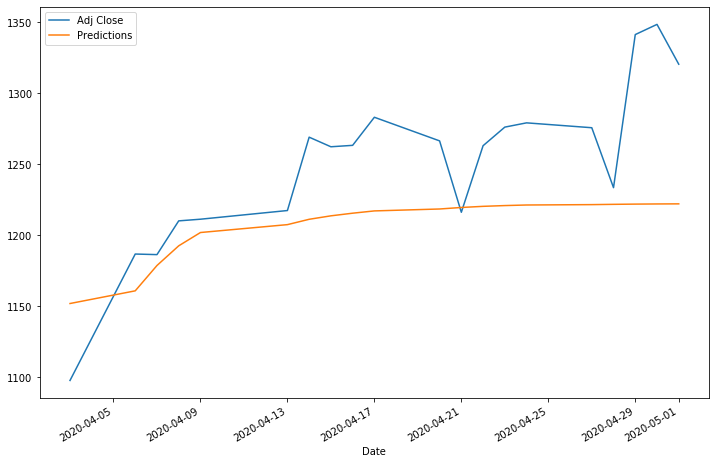

In [36]:
ax=predictions.plot(figsize=(12,8))
plt.show()

In [37]:
# from keras.models import load_model
# model.save(stock_ticker+'.h5')